<a href="https://colab.research.google.com/github/huyunwei/robust/blob/main/robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust Design
## Tolerance Analysis
### Monte Carlo Simulation   

Monte Carlo simulation is a useful method for performing tolerance stack-up analysis. This method relies on statistical sampling to obtain a numerical result.  

Here's a simple example of using Monte Carlo simulation to perform tolerance stack-up analysis. Suppose we have a system with three components, each with its own nominal dimension and tolerance.  

We'll create a Python script to perform 10,000 simulations and understand the distribution of the total stack-up.  

This script defines the nominal dimensions and tolerances of the components and then simulates the total stack-up using random numbers from a normal distribution with means equal to the nominal dimensions and standard deviations equal to the tolerances.

The resulting histogram shows the distribution of the total stack-up over the simulations, which helps in understanding the variability in the system due to the tolerances of the individual components.

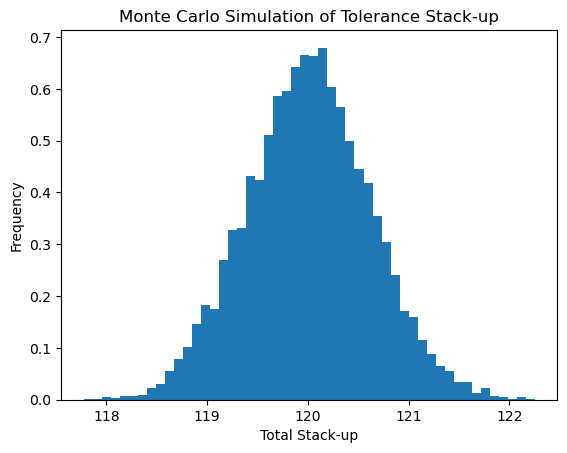

In [1]:
import random
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_simulations):
    # Nominal dimensions and tolerances for three components
    nominal_dimensions = [50, 50, 20]
    tolerances = [0.5, 0.3, 0.2]

    # List to store the total stack-up for each simulation
    total_stack_ups = []

    # Perform simulations
    for _ in range(num_simulations):
        total_stack_up = 0
        for nominal, tolerance in zip(nominal_dimensions, tolerances):
            total_stack_up += random.gauss(nominal, tolerance)
        total_stack_ups.append(total_stack_up)

    return total_stack_ups

# Number of simulations
num_simulations = 10000

# Perform Monte Carlo simulation
total_stack_ups = monte_carlo_simulation(num_simulations)

# Plot histogram
plt.hist(total_stack_ups, bins=50, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()


In [2]:
import numpy as np
import pandas as pd
from io import StringIO
df_csv = """X,mu,sigma
B1, 50, 0.5
B2, 20, 01
B3, 30, 0.2
E, 100.1, 0.3
"""
df_X = pd.read_csv(StringIO(df_csv))
df_X

,X,mu,sigma
0,B1,50.0,0.5
1,B2,20.0,1.0
2,B3,30.0,0.2
3,E,100.1,0.3


In [3]:
N_SIM = int(1e6)
df=pd.DataFrame()
for i in range(df_X.shape[0]):
  df[df_X['X'][i]] = np.random.normal(df_X.mu[i], df_X.sigma[i], N_SIM)

df

,B1,B2,B3,E
0,49.699184,21.521812,30.057914,100.142496
1,50.471785,20.640293,29.968001,100.335219
2,50.143900,20.807174,30.328521,100.045979
3,50.281985,21.131175,30.161922,99.585043
4,49.598811,20.923437,30.232412,100.100858
...,...,...,...,...
999995,49.405701,19.945147,29.836694,100.006719
999996,50.607260,19.549110,29.896571,100.302406
999997,49.603742,18.835527,30.242308,100.773715
999998,50.261527,19.164434,30.166985,100.088722


In [4]:
transf = 'Gap = E - B1 - B2 - B3'
df = df.eval(transf)
df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]  )

,B1,B2,B3,E,Gap
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,49.999323,19.999318,30.000218,100.099964,0.101104
std,0.500617,1.000374,0.200152,0.300229,1.174857
min,47.675990,15.252030,29.073803,98.667410,-5.702511
1%,48.833673,17.669351,29.535599,99.401191,-2.625464
5%,49.176526,18.352847,29.671093,99.606346,-1.828671
25%,49.661718,19.325291,29.865220,99.897497,-0.691045
50%,49.999888,20.001079,30.000033,100.099713,0.101455
75%,50.337628,20.673895,30.135426,100.302218,0.892077
95%,50.823931,21.644902,30.329556,100.593862,2.034961


In [5]:
np.sqrt(np.sum(np.square(df_X.sigma)))

1.174734012447073

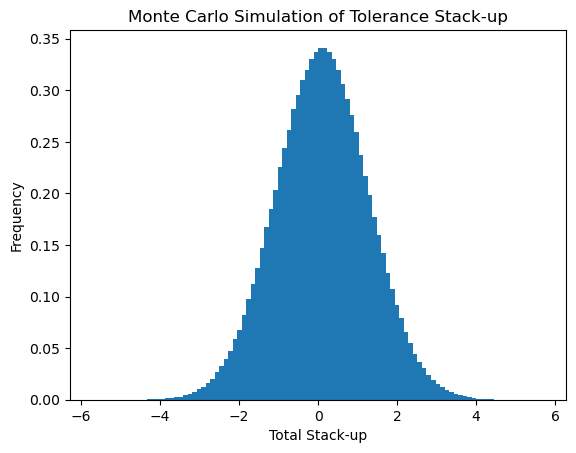

In [8]:
# Plot histogram
plt.hist(df.Gap, bins=100, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

Fitting a Weibull distribution to right-censored time-to-failure data involves statistical methods to estimate the shape and scale parameters of the distribution. Libraries like scipy provide optimization methods for parameter estimation.

Below is a Python code snippet using scipy.optimize to fit a Weibull distribution to right-censored data. For this example, let's assume we have a data set containing time-to-failure data and some censored data points:

In [7]:
from scipy.optimize import minimize
import numpy as np

def weibull_pdf(x, shape, scale):
    return (shape / scale) * ((x / scale) ** (shape - 1)) * np.exp(-((x / scale) ** shape))

def weibull_log_likelihood(params, data, censored_data):
    shape, scale = params
    # Calculate the log-likelihood for non-censored (failed) data
    log_likelihood = np.sum(np.log(weibull_pdf(data, shape, scale)))
    # For right-censored data, the log-likelihood is calculated using the survival function: 1 - CDF
    log_likelihood += np.sum(-(shape / scale) * ((censored_data / scale) ** shape))
    # We return the negative log-likelihood because scipy's "minimize" seeks to find the minimum value of the given function
    return -log_likelihood

# Example time-to-failure data
data = np.array([10, 35, 50, 70])
# Example right-censored data
censored_data = np.array([80, 90])

# Initial guesses for shape and scale parameters
initial_guess = [1.3, 50]

# Optimization to fit Weibull distribution
result = minimize(weibull_log_likelihood, initial_guess, args=(data, censored_data), bounds=[(0.01, 10), (0.01, 100)])

# Resulting shape and scale parameters
shape, scale = result.x

print(f"Shape parameter: {shape}")
print(f"Scale parameter: {scale}")

Shape parameter: 1.8012462759576051
Scale parameter: 48.0148003624413


In [3]:
from lifelines import WeibullFitter
from scipy.special import gamma

# Time to event (either failure or censoring)
durations = [10, 35, 50, 70, 80, 90]

# Event indicator: 1 if the event is observed (failure), 0 if data is censored
event_observed = [1, 1, 1, 1, 0, 0]

# Initialize the fitter
wf = WeibullFitter()

# Fit the data
wf.fit(durations, event_observed=event_observed)

# Print the summary
wf.print_summary()

# You can access the parameters using the following attributes
print("Shape parameter (rho_):", wf.rho_)
print("Scale parameter (lambda_):", wf.lambda_)

# Calculate MTTF
mttf = wf.lambda_ * gamma(1 + 1/wf.rho_)
print(f"Estimated MTTF: {mttf}")

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 6 total observations, 2 right-censored observations>
   number of observations = 6
number of events observed = 4
           log-likelihood = -21.48
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  78.64      28.87            22.06           135.22
rho_      1.38       0.62             0.17             2.59

          cmp to    z    p   -log2(p)
lambda_     1.00 2.69 0.01       7.13
rho_        1.00 0.62 0.54       0.90
---
AIC = 46.96

Shape parameter (rho_): 1.3813143699309725
Scale parameter (lambda_): 78.64137992312745
Estimated MTTF: 71.83061360648522


Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.1696         3.57032   21.9733   36.1131
     Beta         1.86308         0.32449   1.32428   2.62111 

Goodness of fit    Value
 Log-likelihood -79.5482
           AICc  163.802
            BIC  165.088
             AD  0.83728 



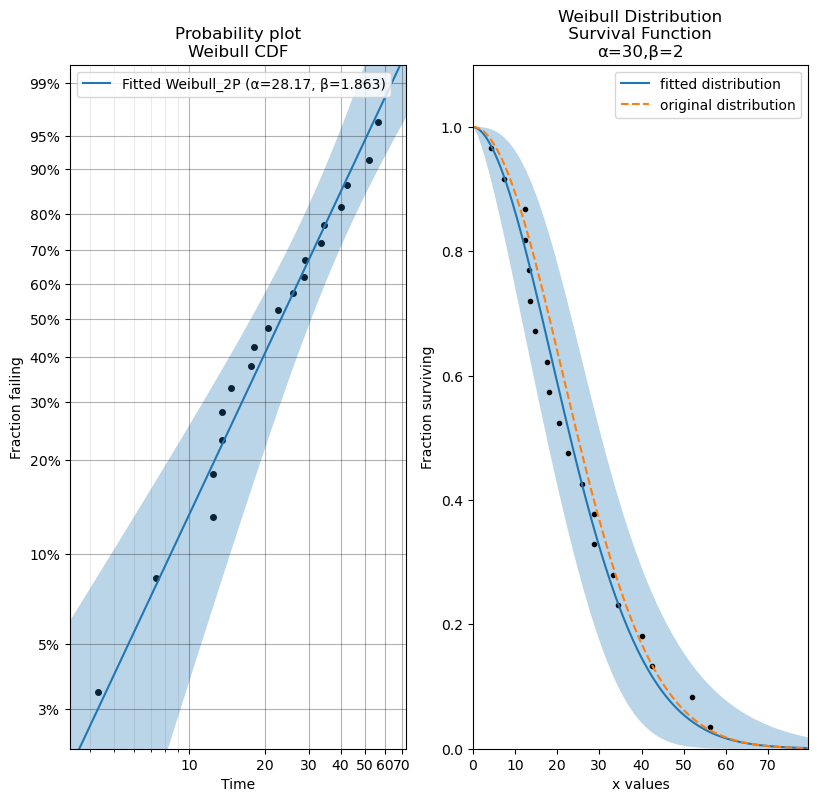

In [4]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=30, beta=2)  # creates the distribution object
data = dist.random_samples(20, seed=42)  # draws 20 samples from the distribution. Seeded for repeatability
plt.subplot(121)
fit = Fit_Weibull_2P(failures=data)  # fits a Weibull distribution to the data and generates the probability plot
plt.subplot(122)
fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
dist.SF(label='original distribution', linestyle='--') # plots the survival function of the original distribution
plot_points(failures=data, func='SF')  # overlays the original data on the survival function
plt.legend()
plt.show()

In [7]:
# import altair with an abbreviated alias
import altair as alt
alt.renderers.enable('mimetype')

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
